# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [3]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering model on the data set using 8 clusters and compute the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for the model.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [10]:
km = KMeans(n_clusters=8)
km.fit(df)

KMeans()

In [11]:
y_pred = km.predict(df)
y_pred

array([0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 4,
       0, 7, 7, 7, 0, 0, 7, 0, 7, 0, 0, 7, 7, 0, 7, 7, 2, 0, 0, 4, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 5, 2, 2, 5, 7,
       2, 2, 5, 3, 5, 7, 2, 7, 2, 2, 2, 5, 3, 4, 2, 2, 5, 1, 2, 2, 5, 5,
       5, 5, 5, 5, 5, 2, 2, 3, 7, 2, 2, 4, 2, 2, 4, 2, 2, 5, 2, 5, 2, 4,
       4, 2, 5, 5, 5, 5, 2, 2, 1, 4, 4, 7, 4, 4, 4, 2, 4, 5, 5, 4, 6, 6,
       6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 6, 6, 6, 6, 1,
       6, 1, 1, 1, 6, 6, 1, 1, 1, 1, 6, 1, 6, 1, 6, 6, 1, 1, 6, 1, 6, 6,
       6, 1])

In [13]:
silhouette_score(df, y_pred)

0.17392882007537383

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [18]:
km5 = KMeans(n_clusters=5)
km5.fit(df)
y_pred_5 = km5.predict(df)
silhouette_score(df, y_pred_5)

0.22982197449666314

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [20]:
km3 = KMeans(n_clusters=3)
km3.fit(df)
y_pred_3 = km3.predict(df)
silhouette_score(df, y_pred_3)

0.2848589191898987

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

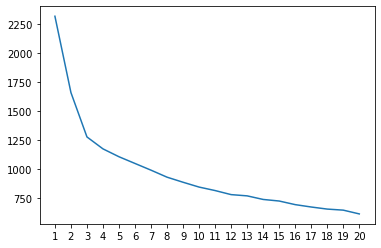

In [21]:
kmeans = [KMeans(n_clusters=i) for i in range(1,21)]
for model in kmeans:
    model.fit(df)
    
inertias = [model.inertia_ for model in kmeans]

plt.plot(range(1,21),inertias)
plt.xticks(range(1,21));

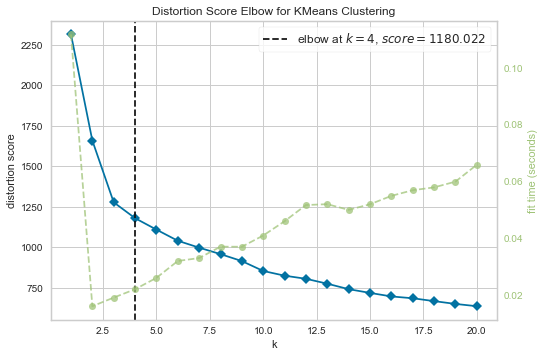

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,21))
visualizer.fit(df)
visualizer.show()

I'd say 3 is a good number of clusters, the slope changes drastically

## 5. Try performing the same elbow tests with an [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) model and compare the results you get to the KMeans results.

In [34]:
from sklearn.cluster import AgglomerativeClustering


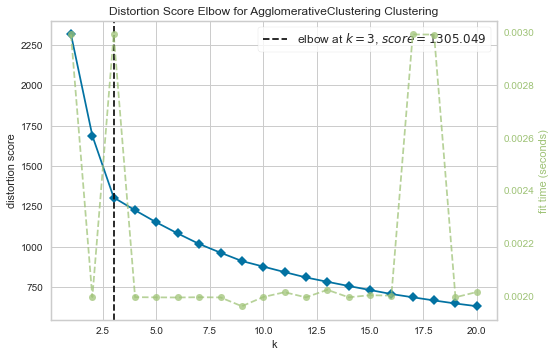

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
agc = AgglomerativeClustering()
visualizer = KElbowVisualizer(agc, k=(1,21))
visualizer.fit(df)
visualizer.show()

3 is again the good number of clusters.

In [54]:
agc3 = AgglomerativeClustering(n_clusters=3)
agc3.fit(df)
y_pred_3_agc = agc3.fit_predict(df)
silhouette_score(df, y_pred_3_agc)

0.2774439826952266

## 6. Create and plot a scatter matrix (pairplot) showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

The best silhouette score was obtained with K-means and 3 clusters, so first, I add the predicted clusters to a dataframe and then I can make the pairplot grouped by the predicted groups:

In [50]:
fulldata = X
fulldata["target"] = y_pred_3
fulldata.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


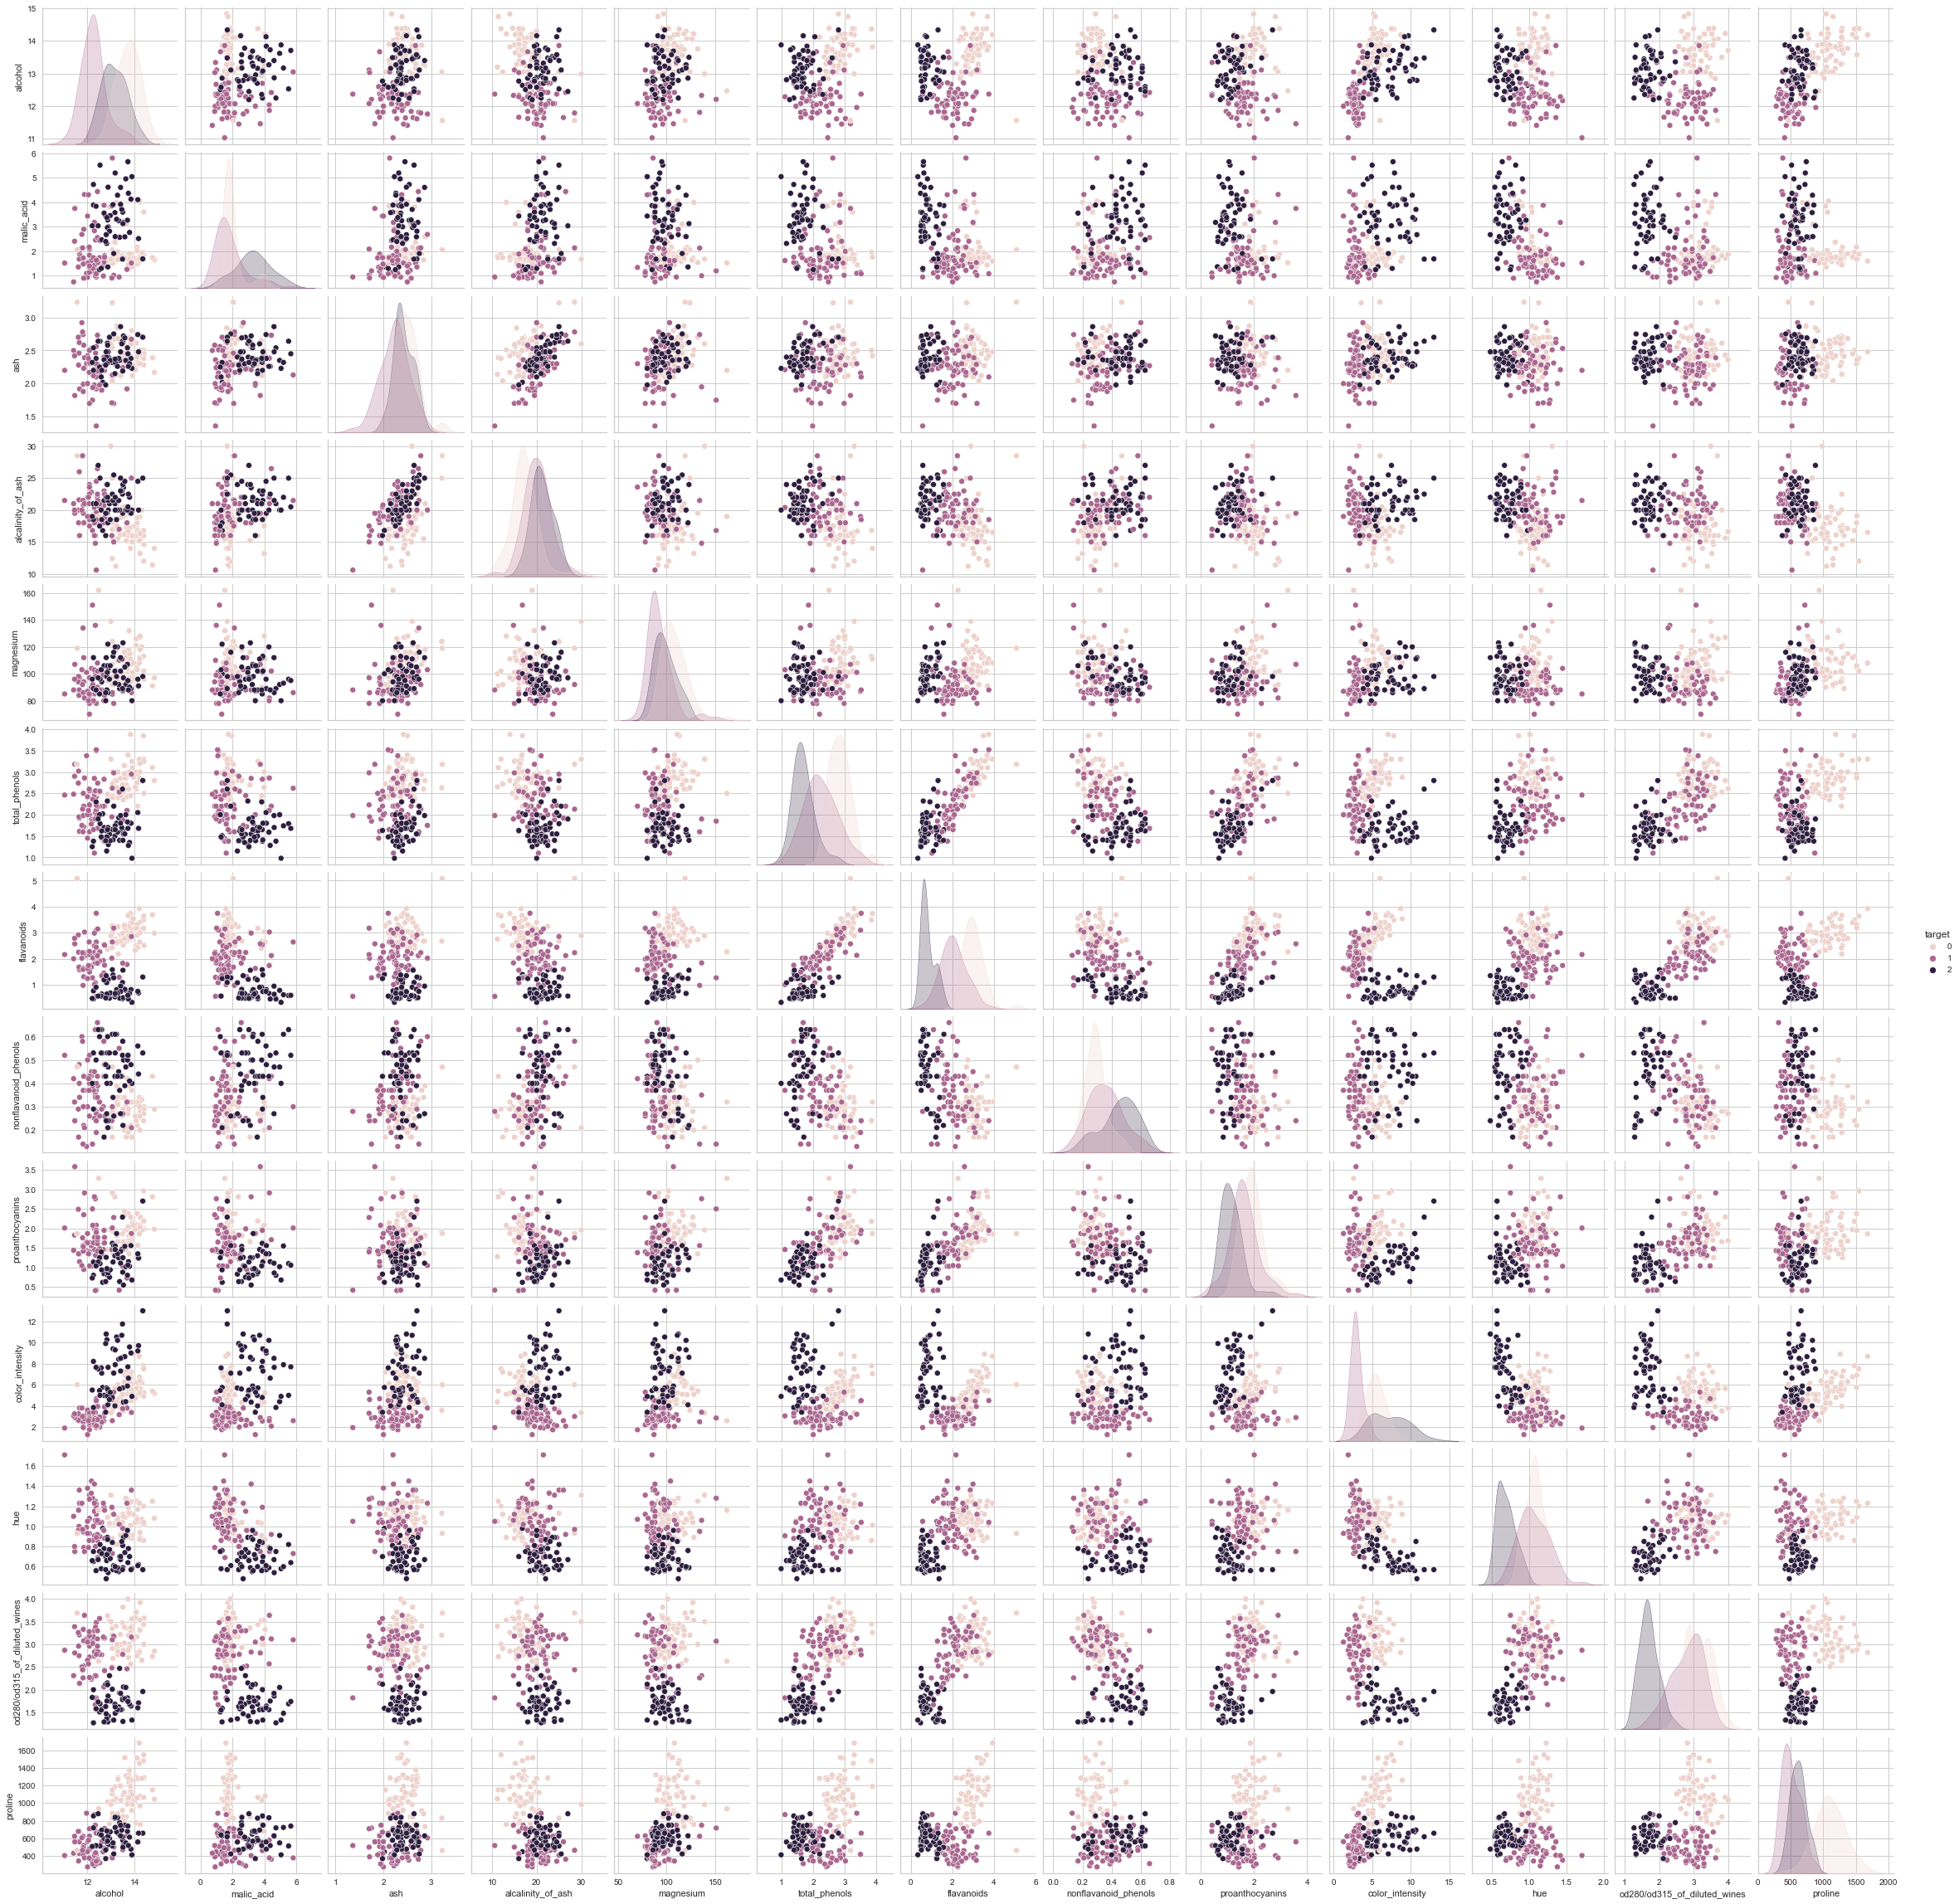

In [51]:
sns.pairplot(fulldata, hue = "target")

## 7. Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) transform and plot the first two principle components with the plot point colors determined by cluster.

In [55]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(2)
wine_t = pd.DataFrame(pca.fit_transform(X), columns = ["PC1","PC2"])
wine_t["groups"] = y_pred_3

C:\Users\anton\miniconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


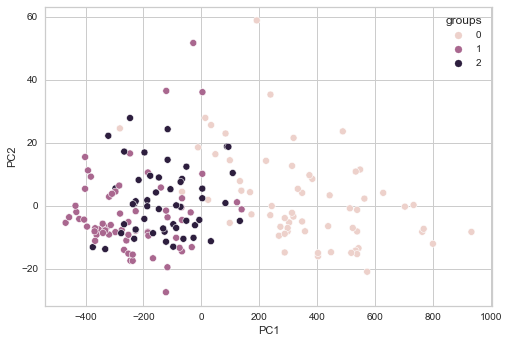

In [59]:
pca_wine = sns.scatterplot(wine_t["PC1"], wine_t["PC2"], hue = wine_t["groups"])

## 8. Generate a series of [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) plots showing the clusters at a variety of perplexities.

First I'm trying each code step by step:

In [60]:
from sklearn.manifold import TSNE

In [67]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, learning_rate=200)

In [68]:
wine_tsne = pd.DataFrame(tsne.fit_transform(df))

In [78]:
wine_tsne["y"] = y

In [79]:
wine_tsne.head()

,0,1,y
0,-7.543328,2.499731,0
1,-5.601223,1.379171,0
2,-6.571546,3.864924,0
3,-8.056377,3.702900,0
4,-4.649123,4.947586,0


C:\Users\anton\miniconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

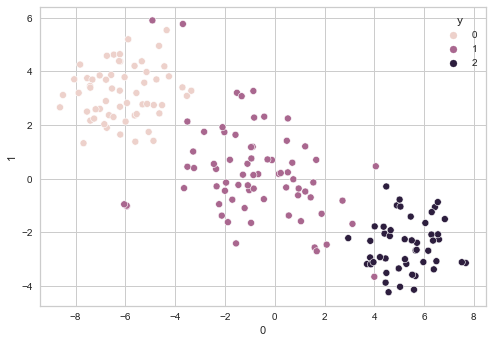

In [83]:
sns.scatterplot(wine_tsne[0],wine_tsne[1], hue = wine_tsne["y"])

Once I have the function I'm going to prepare a function and plot for the following perplexity values:

In [97]:
def plotperplexity(n):   
    print("Perplexity: ", n)
    tsne = TSNE(n_components=2, perplexity=n, n_iter=1000, learning_rate=200)
    wine_tsne = pd.DataFrame(tsne.fit_transform(df))
    wine_tsne["y"] = y
    sns.scatterplot(wine_tsne[0],wine_tsne[1], hue = wine_tsne["y"])

Perplexity:  1


C:\Users\anton\miniconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


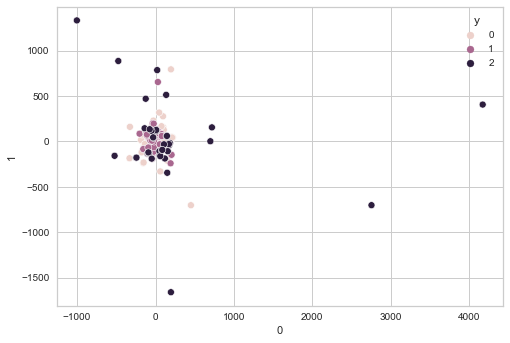

In [101]:
plotperplexity(1)

Perplexity:  5


C:\Users\anton\miniconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


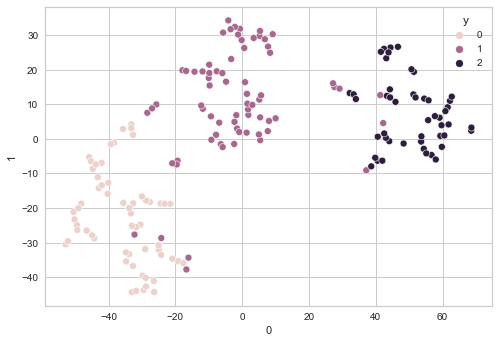

In [102]:
plotperplexity(5)

Perplexity:  10


C:\Users\anton\miniconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


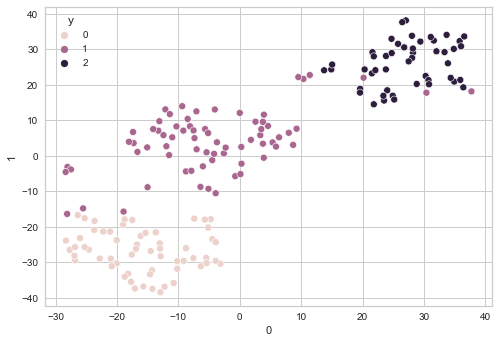

In [103]:
plotperplexity(10)

Perplexity:  15


C:\Users\anton\miniconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


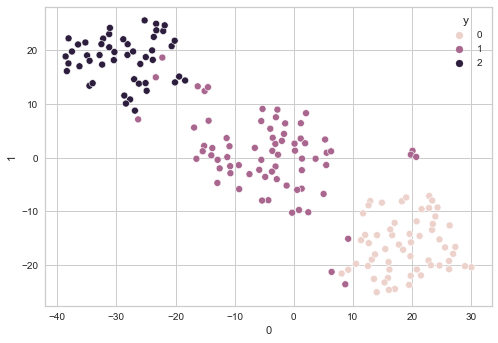

In [105]:
plotperplexity(15)

Perplexity:  20


C:\Users\anton\miniconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


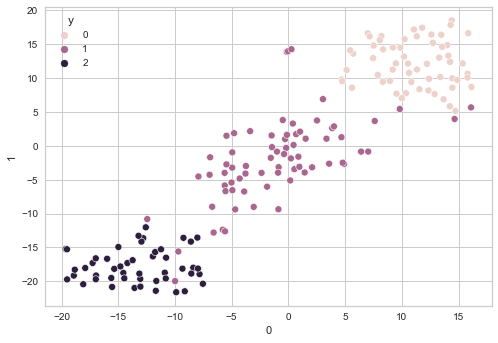

In [104]:
plotperplexity(20)

Perplexity:  40


C:\Users\anton\miniconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


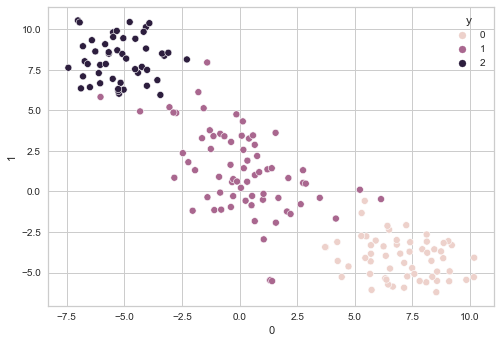

In [106]:
plotperplexity(40)

Perplexity:  100


C:\Users\anton\miniconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


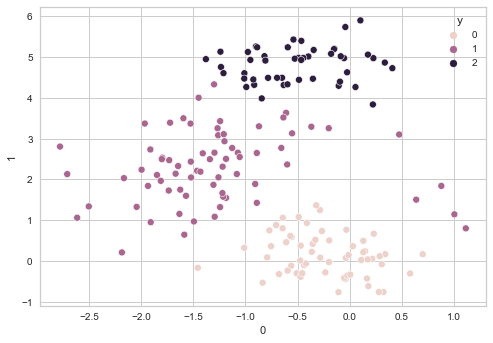

In [107]:
plotperplexity(100)

Perplexity:  200


C:\Users\anton\miniconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


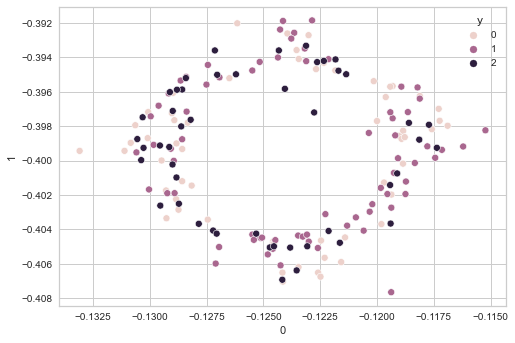

In [108]:
plotperplexity(200)

Perplexity:  1000


C:\Users\anton\miniconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


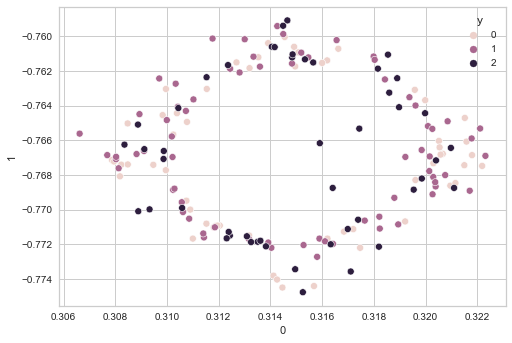

In [109]:
plotperplexity(1000)

For a small perplexity, the points will be all together around the same area, however, with very high perplexity, they will form a ring. With intermediate values it will be possible to identify different groups.